# Import

In [1]:
from datetime import datetime
import json

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data

In [2]:
united = pd.read_csv('united_3.csv')
train=united[united['test']==0]
train = train.reset_index(drop=True)
test=united[united['test']==1]
test = test.reset_index(drop=True)

train.nunique()

test                      1
style                   197
body                     10
color                    16
fuel                      5
model_date               41
doors                     4
production_date          51
transmission              3
engine_displacement      30
engine_power             84
mileage                2288
drive_type                3
wheel                     2
condition                 1
owners                    3
vehicle_title             2
features               4271
price                  1310
tax                      84
tax_per_horse             8
days_in_use              51
mileage_per_day        4276
dtype: int64

Обработка признаков состояла следующим образом:

- Сравнивались данные тренировочные и тестовые данные. Уникальные значения категориальных признаков, которых нет в тестовых данных удалялись из тренировочных данных

- Попытались сократить количесво уникальных значений в категориальных признаках, где это было возможно.

В итоге данные действия помогли сильно улучшить итоговый результат.

In [3]:
# Функция сравнивает уникальные значения признака из данных train и test.
# После этого удаляет из данныех train те значения, которых нет в данных test.

def drop_miss_value(df, column):
    
    drop_list = []

    for cat in df[column].unique():
        if cat in test[column].unique():
            continue
        else:
            drop_list.append(cat)
    print(drop_list)
            
    for date in drop_list:   
        for idx in df[df[column]==date].index:
            df.drop(idx, inplace=True)

    df = df.reset_index(drop=True)
    
    return df

In [4]:
# Функция выводит статистику признака

def stat(column):
    
    display(train[column].value_counts())
    display(train[column].nunique())
    display(test[column].value_counts())
    display(test[column].nunique())
    
    fig, axes = plt.subplots(2, figsize=(20,15))

    sns.countplot(x=column, data=train, ax=axes[0])
    sns.barplot(x=column, y='price', data=train, ax=axes[1])

# body

седан           2951
внедорожник     2593
купе             337
хэтчбек          315
лифтбек          148
универсал         77
кабриолет         58
родстер           22
компактвэн         6
купе-хардтоп       3
Name: body, dtype: int64

10

внедорожник    1626
седан          1595
купе            214
хэтчбек         199
лифтбек         125
универсал        46
кабриолет        19
родстер          10
компактвэн        3
Name: body, dtype: int64

9

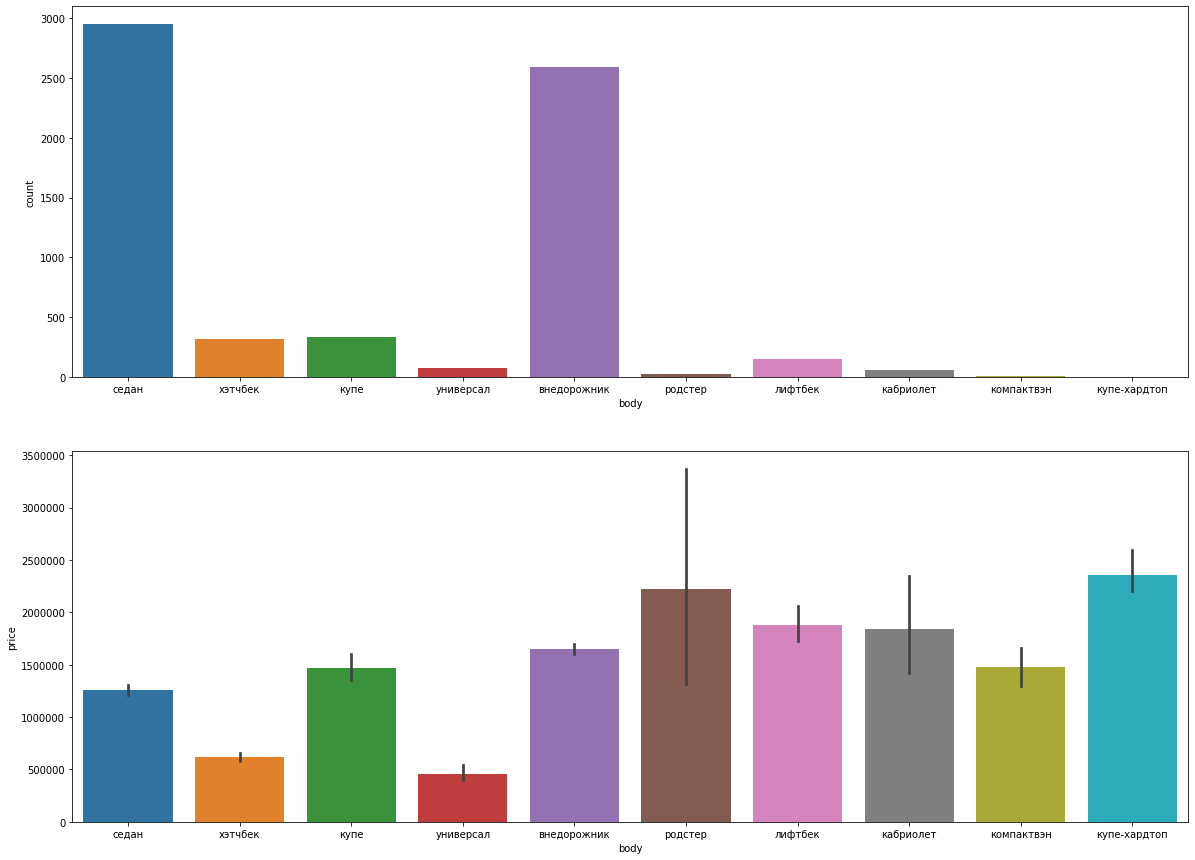

In [5]:
stat('body')

Убирем категории которых нет в тестовом сете

In [6]:
train = drop_miss_value(train, 'body')
train = train.reset_index(drop=True)

['купе-хардтоп']


In [7]:
def body(row):
    
    if row == 'седан':
        return 'body 1'
    
    elif row == 'купе':
        return 'body 1'
    
    elif row == 'компактвэн':
        return 'body 1'
    
    elif row == 'внедорожник':
        return 'body 2'
    
    elif row == 'родстер':
        return 'body 2'
    
    elif row == 'лифтбек':
        return 'body 2'
    
    elif row == 'кабриолет':
        return 'body 2'
    
    elif row == 'хэтчбек':
        return 'body 3'
    
    elif row == 'универсал':
        return 'body 4'
    
    else:
        return row
        
train['body'] = train['body'].apply(body)
test['body'] = test['body'].apply(body)

# color

чёрный         2593
белый          1105
синий           827
серый           757
серебристый     414
коричневый      252
красный         196
зелёный         102
голубой          73
бежевый          61
пурпурный        38
золотистый       35
оранжевый        28
фиолетовый       20
жёлтый            5
розовый           1
Name: color, dtype: int64

16

чёрный         1395
белый           767
синий           510
серый           453
коричневый      216
серебристый     191
красный         115
бежевый          46
голубой          35
зелёный          33
оранжевый        27
золотистый       23
пурпурный        20
фиолетовый        5
жёлтый            1
Name: color, dtype: int64

15

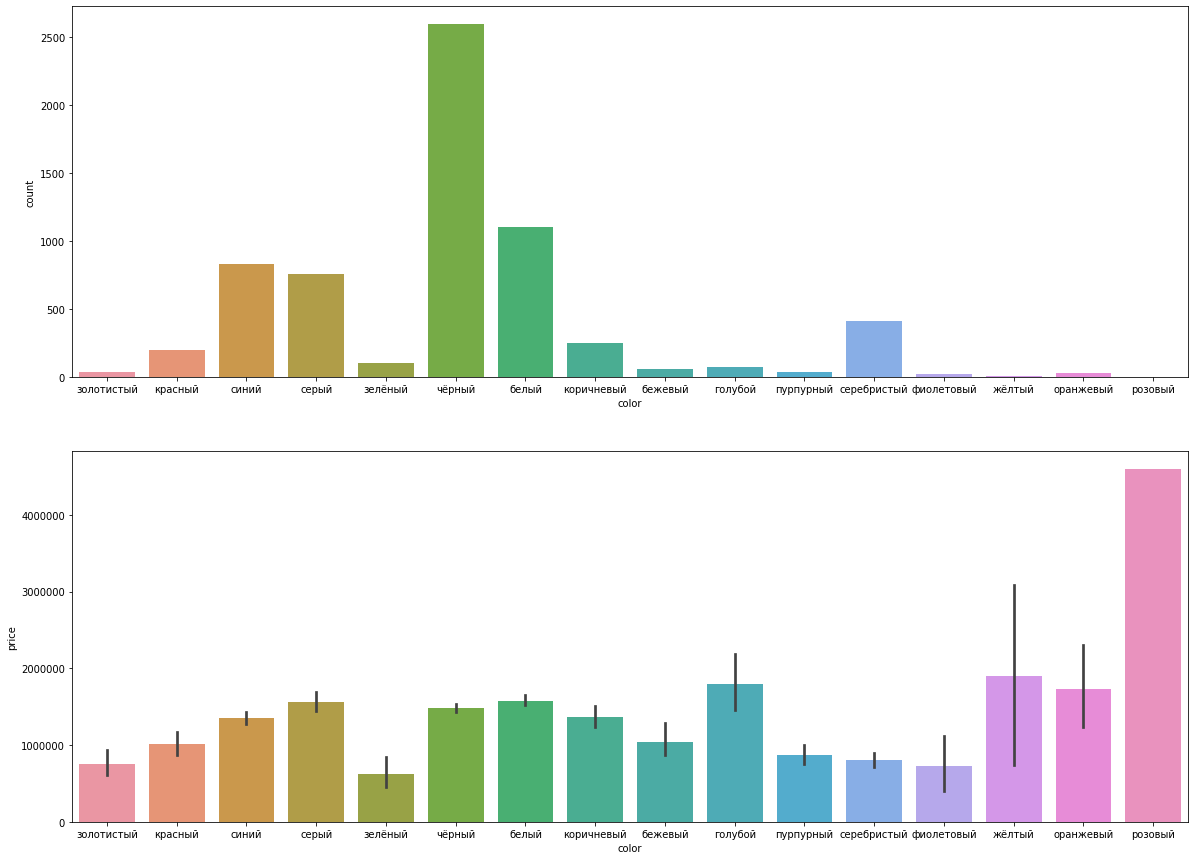

In [8]:
stat('color')

In [9]:
train = drop_miss_value(train, 'color')
train = train.reset_index(drop=True)

['розовый']


In [10]:
def color(row):
    
    if row == 'синий' or row == 'серый' or row == 'чёрный' or row == 'белый' or row == 'голубой' or row == 'коричневый':
        return 'color 1'
    
    elif row == 'золотистый' or row == 'пурпурный' or row == 'серебристый' or row == 'фиолетовый':
        return 'color 2'
    
    elif row == 'красный' or row == 'бежевый':
        return 'color 3'
    
    elif row == 'жёлтый':
        return 'color 4'
    
    elif  row == 'зелёный':
        return 'color 5'

    elif row == 'оранжевый':
        return 'color 6'    
    
    else:
        return row
    
train['color'] = train['color'].apply(color)
test['color'] = test['color'].apply(color)

# fuel

бензин        4471
дизель        1995
бензин-газ      21
гибрид          14
электро          5
Name: fuel, dtype: int64

5

бензин     2471
дизель     1358
гибрид        7
электро       1
Name: fuel, dtype: int64

4

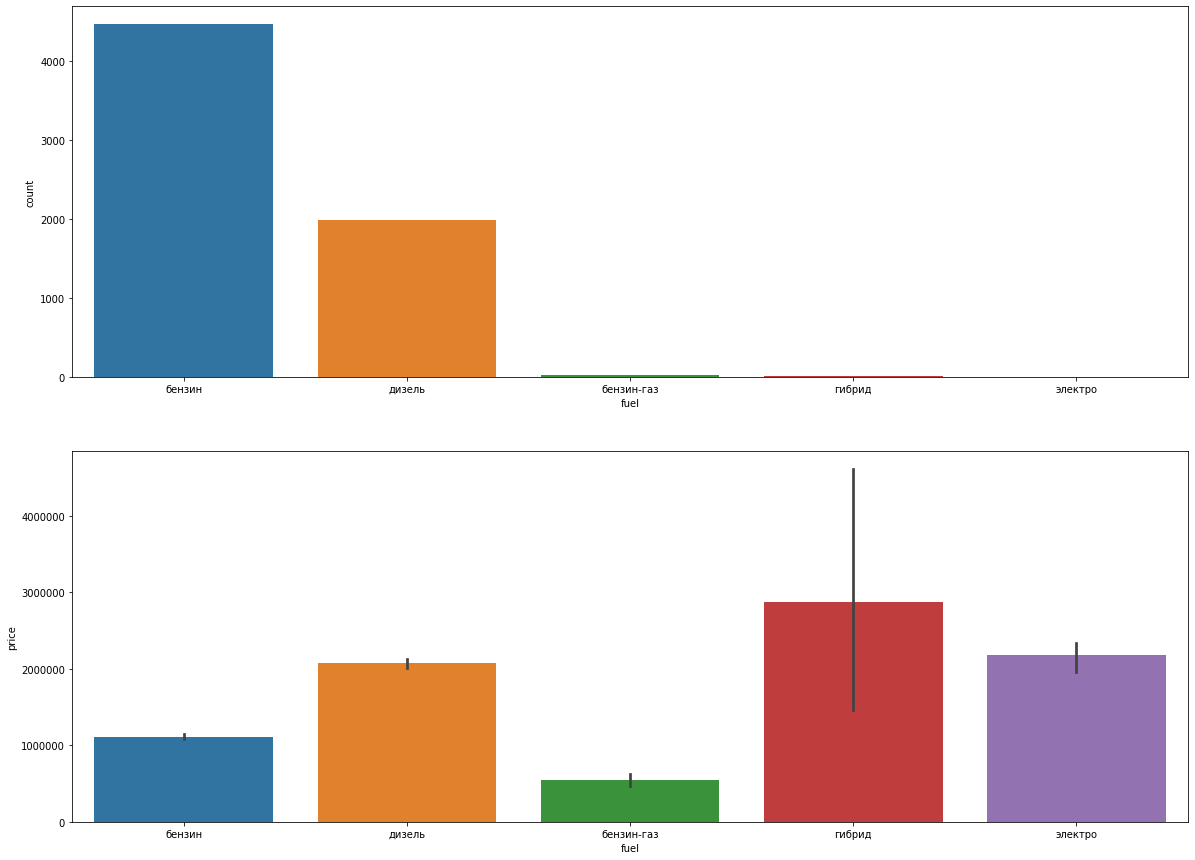

In [11]:
stat('fuel')

In [12]:
train = drop_miss_value(train, 'fuel')
train = train.reset_index(drop=True)

['бензин-газ']


# model_date

2010    704
2008    619
2013    509
2011    451
2006    427
2017    419
2003    379
2014    356
2007    354
2015    337
2012    321
2005    251
2009    210
1995    209
2001    130
1999    123
1987    114
2018    103
2000    100
1998    100
2019     79
1990     72
2004     28
1982     24
1994     19
1986     11
1981      9
1977      5
1937      5
2002      4
1949      2
1975      2
1988      2
1976      1
1968      1
1972      1
1966      1
1992      1
1965      1
1936      1
Name: model_date, dtype: int64

40

2013    380
2011    373
2009    359
2010    308
2007    296
2015    285
2014    267
2012    215
2006    210
2008    191
2016    161
2018    125
2017    122
2005    116
2003     89
2002     54
2001     45
1995     44
1999     35
1998     33
2000     33
2019     26
1987     18
1990     13
2004     12
1982     11
1994      8
1981      3
1986      3
1977      1
1975      1
Name: model_date, dtype: int64

31

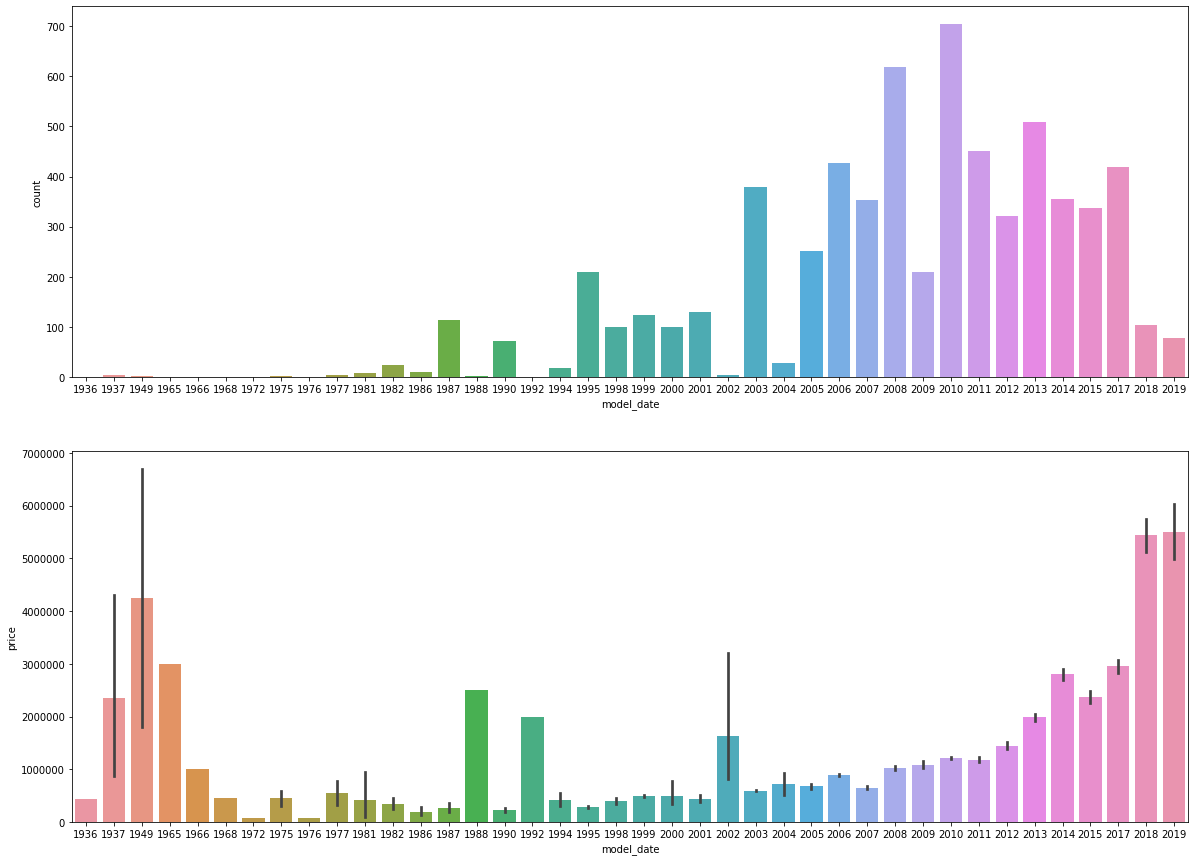

In [13]:
stat('model_date')

In [14]:
train['model_date'] = train['model_date'].apply(lambda x: 2014 if x==2104 else x)
train['model_date'] = train['model_date'].apply(lambda x: 2012 if x==2102 else x)

In [15]:
train = drop_miss_value(train, 'model_date')
train = train.reset_index(drop=True)

[1976, 1972, 1937, 1936, 1968, 1966, 1949, 1992, 1988, 1965]


In [16]:
# train['model_date'].dropna(inplace=True)

In [17]:
def model_date(row):
    
    if row == 2019 or row == 2018:
        return 'model date 1'
    
    elif row == 2017 or row == 2016 or row == 2014:
        return 'model date 2'
    
    elif row == 2010 or row == 2012:
        return 'model date 3'
    
    elif row == 2011 or row == 2009 or row == 2008 or row == 2006 or row == 2004  or row == 1977:
        return 'model date 4'
    
    elif row == 2007 or row == 2005 or row == 2003 or row == 2006 or row == 2002:
        return 'model date 5' 
    
    elif row == 2001 or row == 2000 or row == 1999 or row == 1998 or row == 1994 or row == 1987 or row == 1982 or row == 1981 or row == 1975:
        return 'model date 6'
    
    elif row == 1995 or row == 1990 or row == 1986:
        return 'model date 7'

    elif row == 2015:
        return 'model date 9'
    
    else:
        return 'model date 10'
    
train['model_date'] = train['model_date'].apply(model_date)
test['model_date'] = test['model_date'].apply(model_date)

# doors

5    3047
4    2930
2     416
3      76
Name: doors, dtype: int64

4

5    1963
4    1594
2     244
3      36
Name: doors, dtype: int64

4

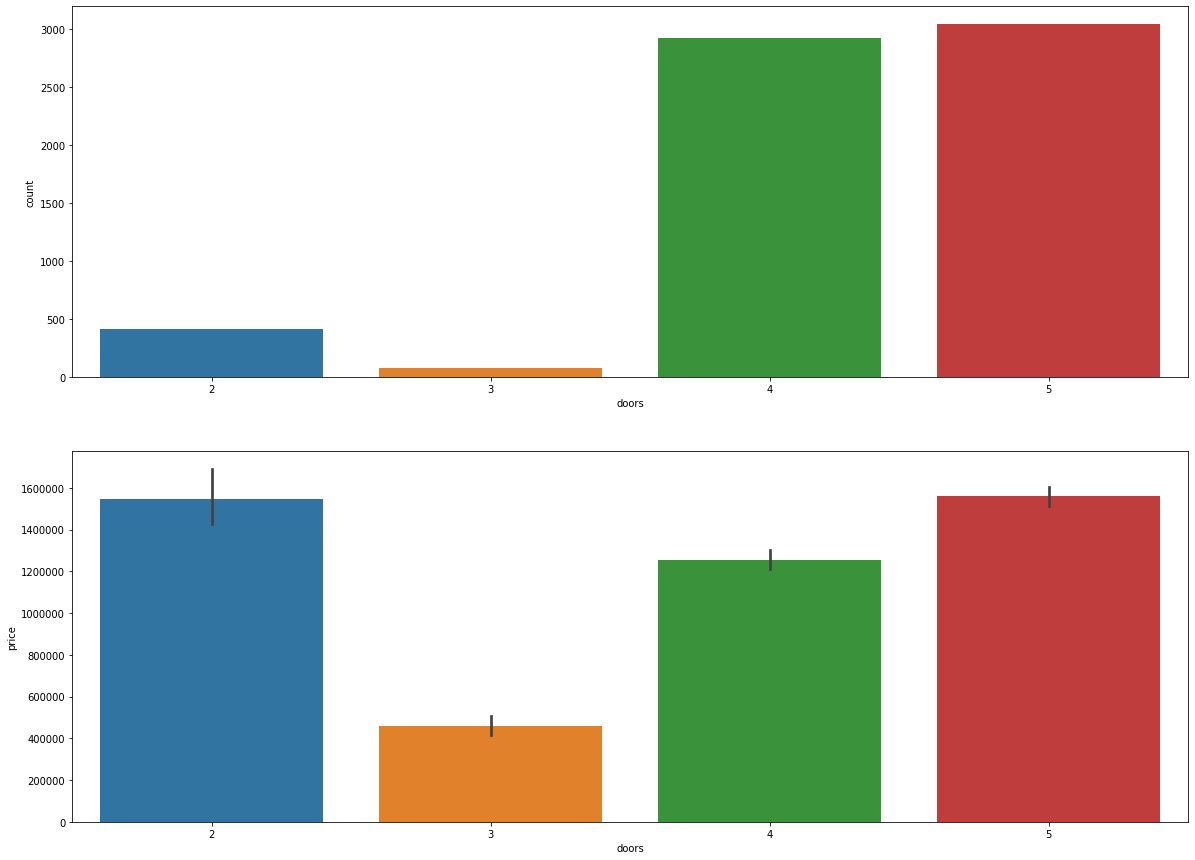

In [18]:
stat('doors')

# production_date

2013    593
2012    564
2011    554
2008    476
2010    377
2014    345
2017    323
2016    323
2018    320
2009    309
2007    292
2019    287
2015    258
2004    164
2005    153
2006    150
2003    126
2001    119
2002    118
1998     90
1999     84
1997     75
2000     72
2020     54
1996     35
1991     29
1990     27
1993     27
1994     25
1992     24
1995     18
1989     13
1988     12
1987      7
1985      6
1984      5
1983      4
1986      4
1982      3
1980      3
1981      1
Name: production_date, dtype: int64

41

2013    432
2012    386
2011    345
2014    312
2018    267
2019    262
2016    254
2015    229
2008    228
2010    205
2017    196
2007    149
2009    142
2005     63
2004     60
2006     52
2003     48
2002     41
2001     36
1998     22
2000     22
1999     20
1997     14
1996      9
1992      8
1995      6
1993      6
1989      6
1991      3
1984      3
1994      2
1990      2
1988      2
1982      2
1981      1
1987      1
1986      1
Name: production_date, dtype: int64

37

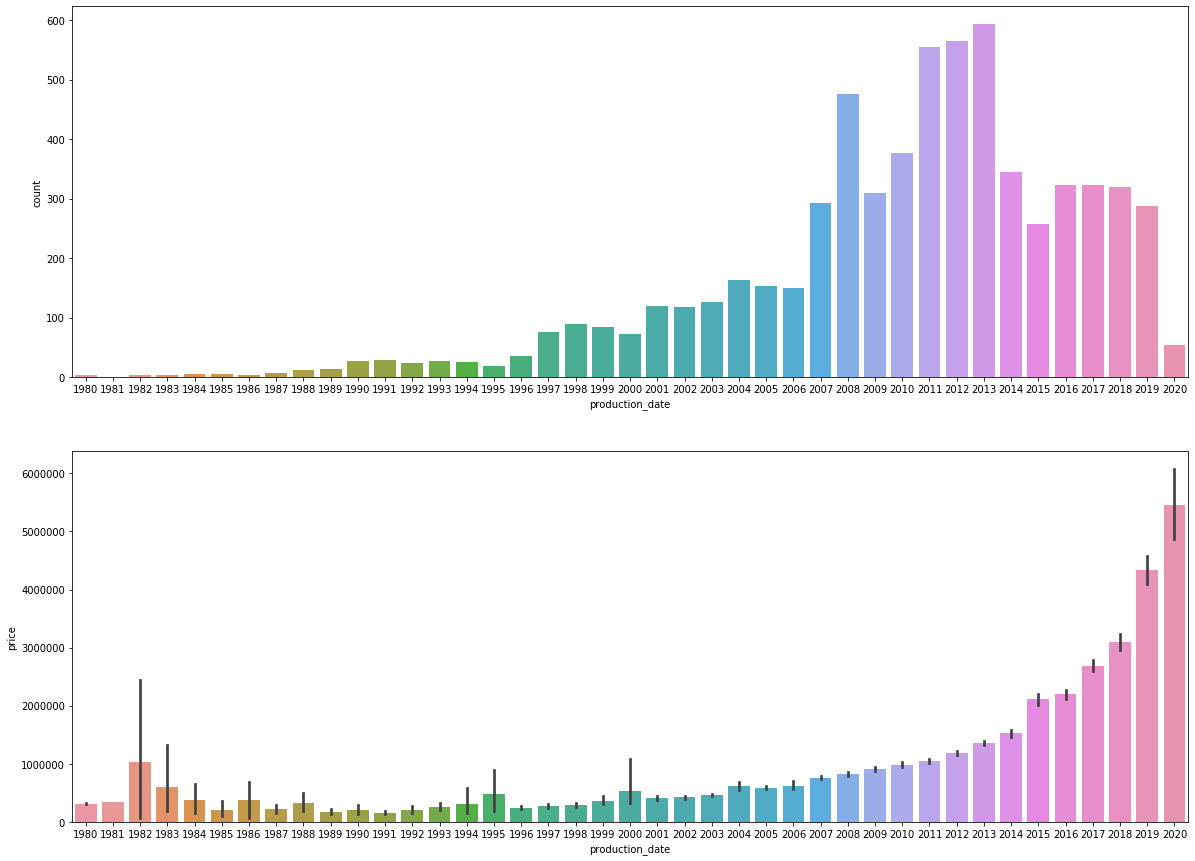

In [19]:
stat('production_date')

In [20]:
train = drop_miss_value(train, 'production_date')
train = train.reset_index(drop=True)

[1985, 1983, 1980, 2020]


In [21]:
# def production_date(row):
    
#     if row == 2019:
#         return 'prod date 1'
    
#     elif row == 2018:
#         return 'prod date 2'
    
#     elif row == 2017:
#         return 'prod date 3'
    
#     elif row == 2016 or row == 2015:
#         return 'prod date 4'
    
#     elif row == 2014:
#         return 'prod date 5'
    
#     elif row == 2013 or row == 1982:
#         return 'prod date 6'
    
#     elif row == 2012:
#         return 'prod date 7'
    
#     elif row == 2011:
#         return 'prod date 8'
    
#     elif row == 2010:
#         return 'prod date 9'
    
#     elif row == 2009:
#         return 'prod date 10'
    
#     elif row == 2008:
#         return 'prod date 11'
    
#     elif row == 2007:
#         return 'prod date 12'
    
#     elif row == 2006 or row == 2005 or row == 2004 or row == 1986:
#         return 'prod date 13'
    
#     elif row == 2003 or row == 2002 or row == 2001 or row == 1999 or row == 1995 or row == 1994 or row == 1988 or row == 1984:
#         return 'prod date 14'
    
#     elif row == 2000 or row == 1998 or row == 1997 or row == 1993 or row == 1981:
#         return 'prod date 15'
    
#     elif row == 1996 or row == 1992 or row == 1991 or row == 1990 or row == 1987:
#         return 'prod date 16'
    
#     elif row == 1991 or row == 1989:
#         return 'prod date 17'
    
#     else:
#         return row
    
# train['production_date'] = train['production_date'].apply(production_date)
# test['production_date'] = test['production_date'].apply(production_date)

# transmission

автоматическая      5887
механическая         442
роботизированная      73
Name: transmission, dtype: int64

3

автоматическая      3677
механическая         111
роботизированная      49
Name: transmission, dtype: int64

3

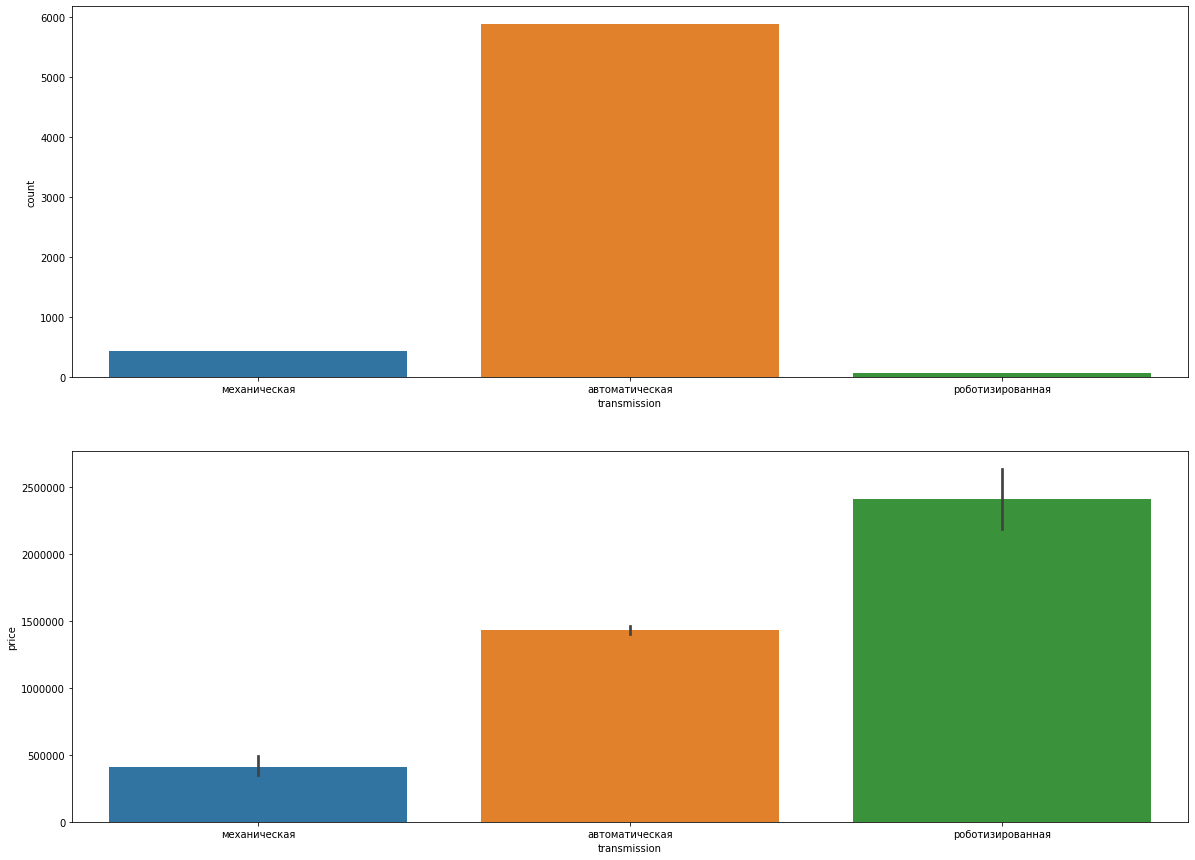

In [22]:
stat('transmission')

# engine_displacement

2.0      2279
3.0      2205
4.4       582
2.5       545
1.6       277
4.8       117
2.2        65
1.5        58
1.8        52
2.8        48
1.9        35
4.0        32
3.5        22
2.9        12
5.0        12
3.6        11
6.0        11
3.4         9
4.6         7
170.0       5
0.7         3
5.4         3
3.3         3
6.6         3
4.9         2
2.7         1
1.7         1
2.4         1
3.2         1
Name: engine_displacement, dtype: int64

29

2.0    1538
3.0    1353
4.4     305
2.5     239
1.6     173
1.5      66
4.8      64
2.2      20
2.8      14
4.0      13
1.8      10
1.9       7
5.4       6
6.0       5
6.6       4
3.5       4
2.9       4
4.6       4
5.0       3
3.6       3
3.4       1
Name: engine_displacement, dtype: int64

21

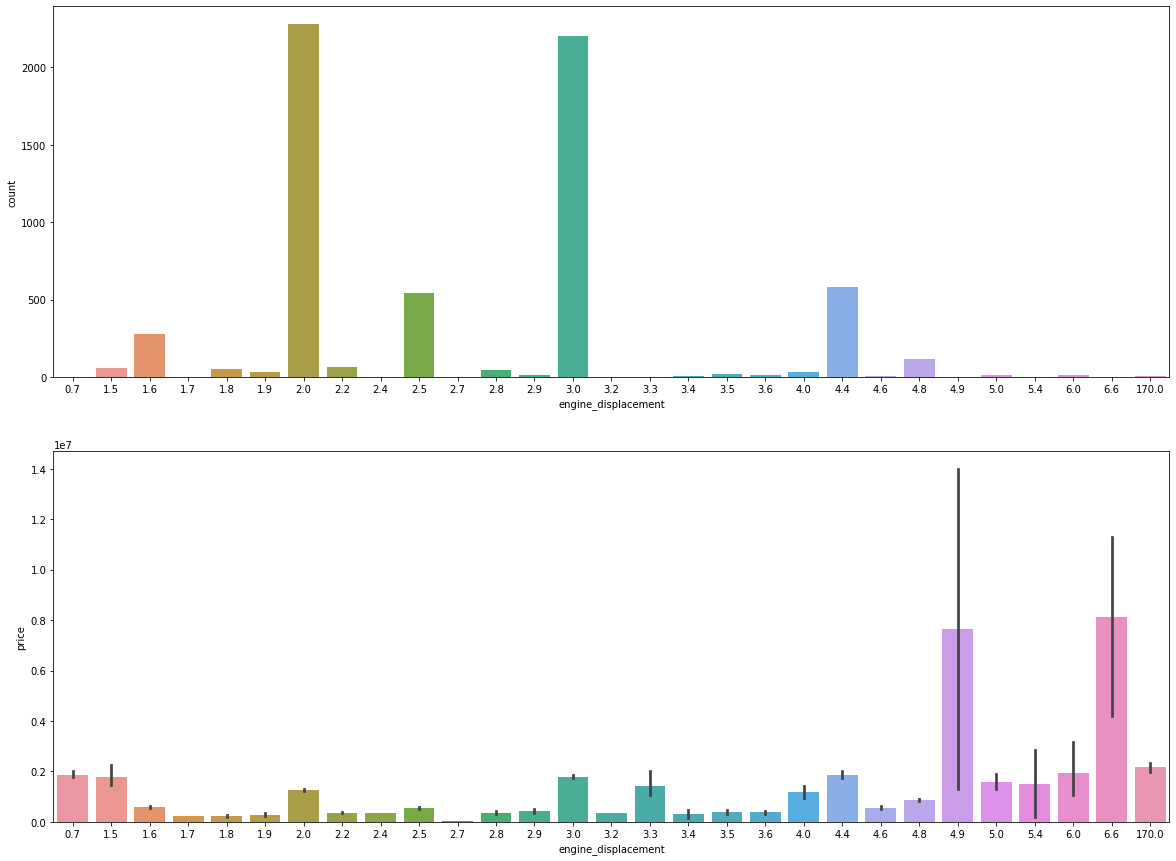

In [23]:
stat('engine_displacement')

In [24]:
train['engine_displacement'] = train['engine_displacement'].apply(lambda x: 3.0 if x == 170.0 else x)

In [25]:
train = drop_miss_value(train, 'engine_displacement')
train = train.reset_index(drop=True)

[2.7, 1.7, 3.2, 2.4, 3.3, 4.9, 0.7]


In [26]:
def engine_displacement(row):
    
    if row == 4.4 or row == 3.0 or row == 1.5:
        return 'eng dis 1'
    
    elif row == 6.0 or row == 5.0 or row == 4.0 or row == 2.0:
        return 'eng dis 2'
    
    elif row == 5.4 or row == 4.8:
        return 'eng dis 3'
    
    elif row == 4.6 or row == 2.9 or row == 3.5 or row == 3.6 or row == 2.5 or row == 1.6:
        return 'eng dis 4'    

    elif row == 2.2 or row == 2.8 or row == 3.4 or row == 1.9 or row == 1.8:
        return 'eng dis 5'    
    
    elif row == 6.6:
        return 'eng dis 5'
    
    else:
        return row
    
train['engine_displacement'] = train['engine_displacement'].apply(engine_displacement)
test['engine_displacement'] = test['engine_displacement'].apply(engine_displacement)

# engine_power

184    796
306    458
218    425
245    414
190    372
249    353
150    320
231    266
136    258
170    194
258    182
407    182
272    170
115    150
192    149
156    121
177    120
235    115
286    109
555    101
320    101
313     91
355     79
450     70
204     64
575     54
193     52
381     45
333     42
143     39
264     38
326     31
367     30
340     27
129     24
265     24
400     22
163     22
118     20
140     19
560     18
113     17
102     17
420     15
625     15
105     15
211     13
507     11
360      9
462      8
530      8
125      8
347      7
300      6
445      6
197      6
269      6
122      6
431      5
188      5
100      5
544      5
329      4
370      4
116      3
460      2
510      2
238      2
600      2
609      2
234      1
252      1
480      1
90       1
610      1
75       1
233      1
449      1
230      1
Name: engine_power, dtype: int64

79

184    636
249    300
245    293
306    281
190    260
218    212
136    193
150    130
258    127
231     97
407     92
272     84
177     82
313     78
320     78
170     70
156     63
115     58
192     55
450     50
235     50
355     47
555     44
286     43
204     41
575     31
381     25
340     24
143     21
264     20
326     20
400     17
163     16
265     16
367     15
333     15
193     14
140     13
625     10
560     10
530      9
100      7
360      7
420      6
118      5
431      5
197      5
600      4
445      4
347      4
129      3
507      3
329      3
269      3
113      3
300      3
105      3
610      3
370      3
410      3
122      3
102      2
125      2
462      2
544      1
188      1
230      1
252      1
374      1
460      1
609      1
211      1
243      1
449      1
90       1
Name: engine_power, dtype: int64

75

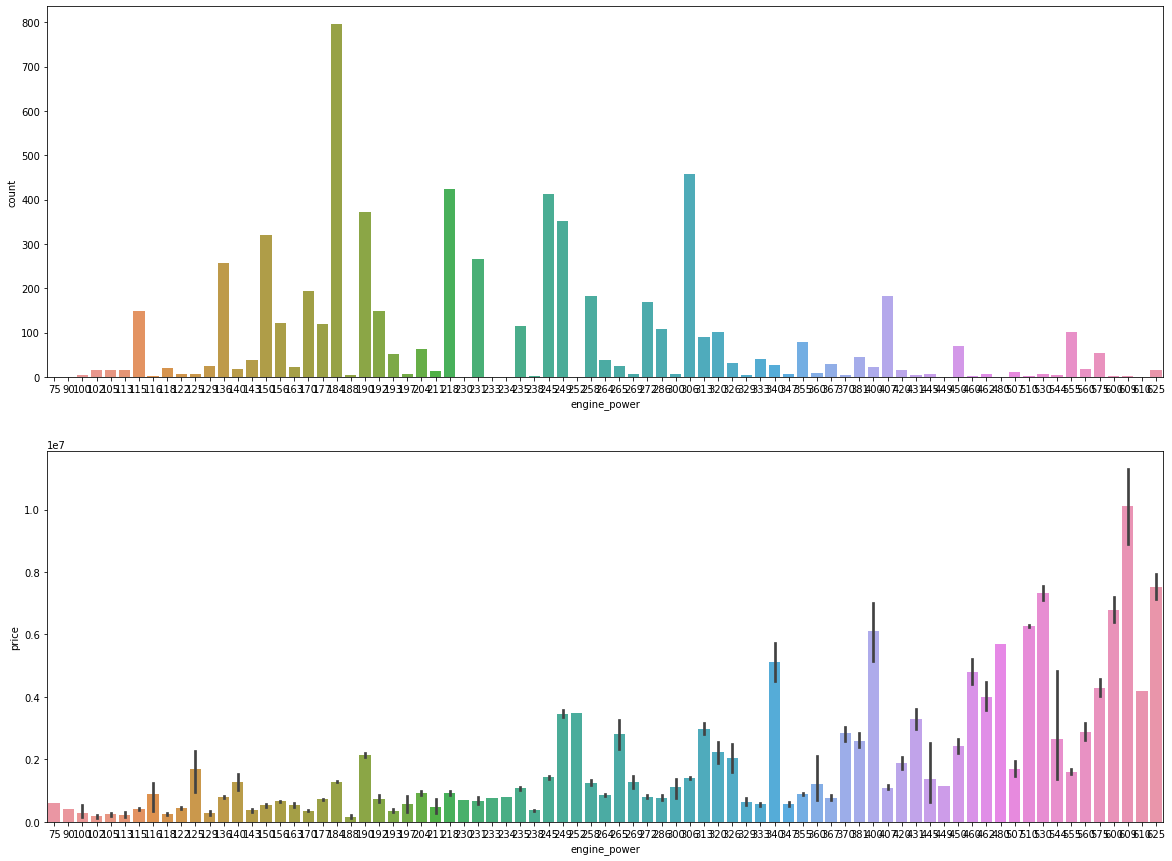

In [27]:
stat('engine_power')

In [28]:
train = drop_miss_value(train, 'engine_power')
train = train.reset_index(drop=True)

[116, 238, 75, 233, 234, 480, 510]


In [29]:
train.dropna(inplace=True)

# days_in_use

2764     593
3130     564
3495     554
4591     476
3860     377
2399     344
1303     323
1669     320
938      320
4225     308
4956     290
573      284
2034     257
6052     163
5686     153
5321     150
6417     126
7147     118
6782     116
8243      89
7878      83
8608      75
7513      70
8974      35
10800     29
11165     27
10069     27
9704      25
10435     24
9339      18
11530     13
11896     12
12261      7
13357      4
12626      3
14087      2
Name: days_in_use, dtype: int64

36

2764     432
3130     386
3495     345
2399     312
938      267
573      262
1669     254
2034     229
4591     228
3860     205
1303     196
4956     149
4225     142
5686      63
6052      60
5321      52
6417      48
6782      41
7147      36
7513      22
8243      22
7878      20
8608      14
8974       9
10435      8
10069      6
9339       6
11530      6
10800      3
13357      3
9704       2
11165      2
11896      2
14087      2
12261      1
12626      1
14452      1
Name: days_in_use, dtype: int64

37

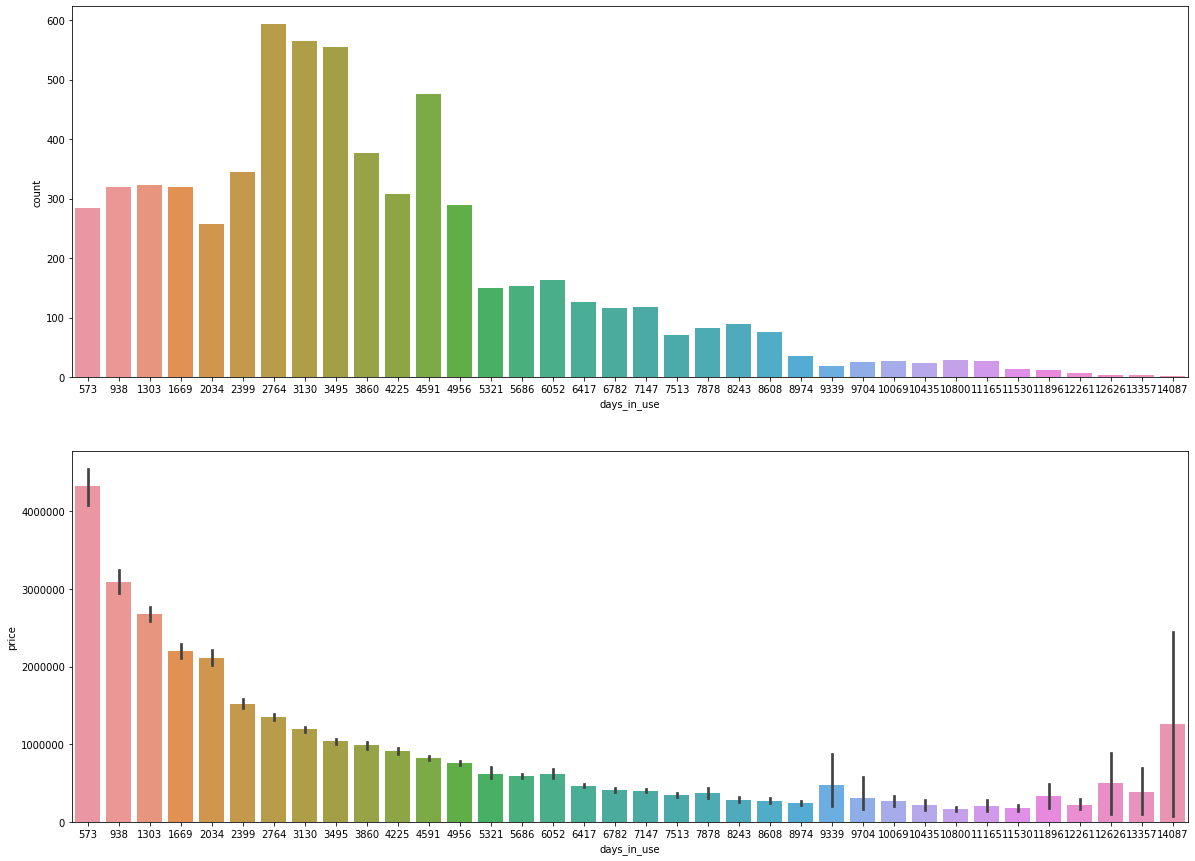

In [30]:
stat('days_in_use')

# style

30d              395
520i             376
35i              303
320i             300
116i             195
318i             189
520d             181
4.4              173
525i             163
3.0i             161
20d              153
523i             129
530d xDrive      119
20d xDrive       115
320i xDrive      110
30i              105
18i              101
528i xDrive      100
40d              100
325i              95
750Li xDrive      87
20i xDrive        87
316i              84
3.0si             82
50i               80
320d xDrive       78
20i               78
520d xDrive       76
3.0d              68
530i              64
528i              63
48i               61
118i              60
25i               59
320d              58
4.4i              58
325xi             58
28i xDrive        49
M50d              47
25d               47
35d               47
730Ld xDrive      44
328i              39
525d xDrive       38
30d xDrive        35
535i              33
28i               33
525xi        

186

30d              255
35i              194
320i             171
520i             142
20d              134
530d xDrive      108
116i             102
520d              98
320d xDrive       95
320i xDrive       92
20d xDrive        92
4.4               88
318i              87
40d               81
20i xDrive        81
528i xDrive       79
18i               71
118i              66
20i               60
28i xDrive        58
30i               56
523i              56
525i              54
325i              53
750Li xDrive      53
316i              51
320d              42
50i               40
3.0i              39
520d xDrive       38
730Ld xDrive      38
3.0si             36
48i               34
325xi             34
3.0d              33
25i               32
M50d              30
28i               30
4.4i              29
30d xDrive        29
530i xDrive       27
25d               27
530i              27
528i              24
18d xDrive        21
35d               20
640i xDrive       18
328i         

173

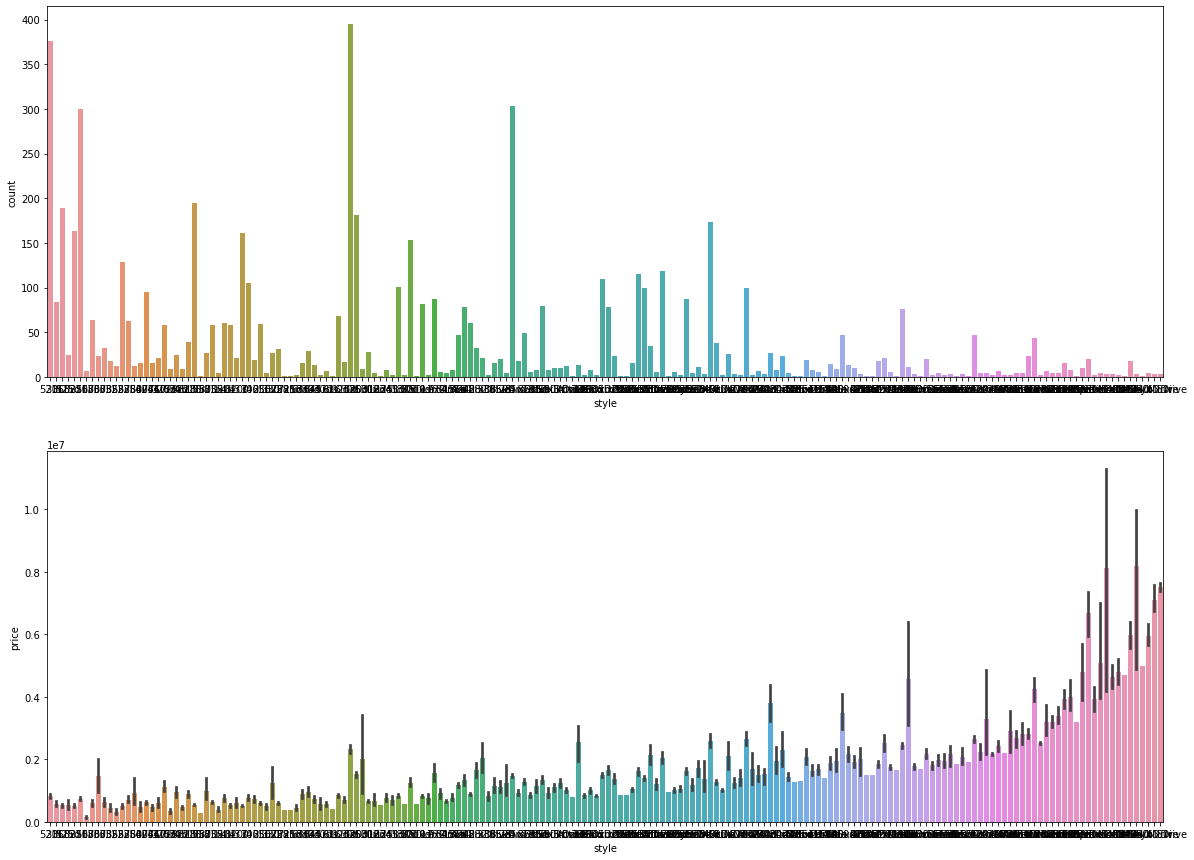

In [31]:
stat('style')

Слишком много значений. Оставим как есть.

In [32]:
train = drop_miss_value(train, 'style')

['518i', '728Li', '725d', '123d', '745d', '320xd', '1.9', '2.8', '2.5', '528Li', '740d', '220d', '535xi', '435i xDrive', 'M135i', '218d', '535Li', '2.0d', 'sDrive20i', '94Ah', '440i xDrive', '40e']


In [33]:
df = pd.concat([train, test])

In [34]:
df.reset_index(drop=True)

,test,style,body,color,fuel,model_date,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,condition,owners,vehicle_title,features,price,tax,tax_per_horse,days_in_use,mileage_per_day
0,0,520i,body 1,color 3,бензин,model date 6,4,1991,механическая,eng dis 2,129,300000.0,задний,Левый,Не требует ремонта,3,Оригинал,Unknown,60000.0,4515.0,35,10800,27.777778
1,0,316i,body 1,color 1,бензин,model date 7,4,1992,механическая,eng dis 4,102,300000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,68000.0,2550.0,25,10435,28.749401
2,0,318i,body 1,color 5,бензин,model date 7,4,1994,механическая,eng dis 5,115,350000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,70000.0,2875.0,25,9704,36.067601
3,0,520i,body 1,color 1,бензин,model date 6,4,1992,механическая,eng dis 2,150,100000.0,задний,Левый,Не требует ремонта,3,Оригинал,Unknown,70000.0,5250.0,35,10435,9.583134
4,0,520i,body 1,color 1,бензин,model date 6,4,1982,механическая,eng dis 2,125,250000.0,задний,Левый,Не требует ремонта,1,Оригинал,Unknown,70000.0,3125.0,25,14087,17.746859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10166,1,520i,body 1,color 1,бензин,model date 10,4,2013,автоматическая,eng dis 2,184,98000.0,задний,Левый,Не требует ремонта,3,Оригинал,"'Круиз-контроль', 'Система «старт-стоп»', 'Мул...",0.0,9200.0,50,2764,35.455861
10167,1,30d,body 2,color 1,дизель,model date 10,5,2016,автоматическая,eng dis 1,249,169615.0,полный,Левый,Не требует ремонта,1,Оригинал,"'Круиз-контроль', 'Мультифункциональное рулево...",0.0,18675.0,75,1669,101.626723
10168,1,525xi,body 1,color 1,бензин,model date 5,4,2006,автоматическая,eng dis 4,218,180000.0,полный,Левый,Не требует ремонта,3,Оригинал,"'Круиз-контроль', 'Запуск двигателя с кнопки',...",0.0,14170.0,65,5321,33.828228
10169,1,528i xDrive,body 1,color 1,бензин,model date 4,4,2012,автоматическая,eng dis 2,245,137500.0,полный,Левый,Не требует ремонта,3,Оригинал,"'Круиз-контроль', 'Мультифункциональное рулево...",0.0,18375.0,75,3130,43.929712


Добавим дополнительный признак. Количество лет в использовании. По сути это тоже самое, что и количество дней в использовании. Посмотрим какой признак даст лучший результат.

In [35]:
def years_in_use(row):
    
    delta = 2020 - row
    return delta

df['years_in_use'] = df['production_date'].apply(years_in_use)

In [37]:
df.to_csv('cars_new.csv', index=False)